# Regularized/Penalized Regression: LASSO Regression (Sklearn)

"Least Absolute Shrinkage And Selection Operator Regularization"

Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty (based on the sum of the absolute coefficient values). This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task. This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection. A hyperparameter is used called “lambda” that controls the weighting of the penalty to the loss function. A default value of 1.0 will give full weightings to the penalty; a value of 0 excludes the penalty. Very small values of lambda, such as 1e-3 or smaller, are common.

The housing dataset is a standard machine learning dataset comprising 506 rows of data with 13 numerical input variables and a numerical target variable. Using a test harness of repeated stratified 10-fold cross-validation with three repeats, a naive model can achieve a mean absolute error (MAE) of about 6.6. A top-performing model can achieve a MAE on this same test harness of about 1.9. This provides the bounds of expected performance on this dataset.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# load data and store in df

"""
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
"""

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Explore data

In [3]:
# show summary statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# get shape of df
df.shape

(506, 14)

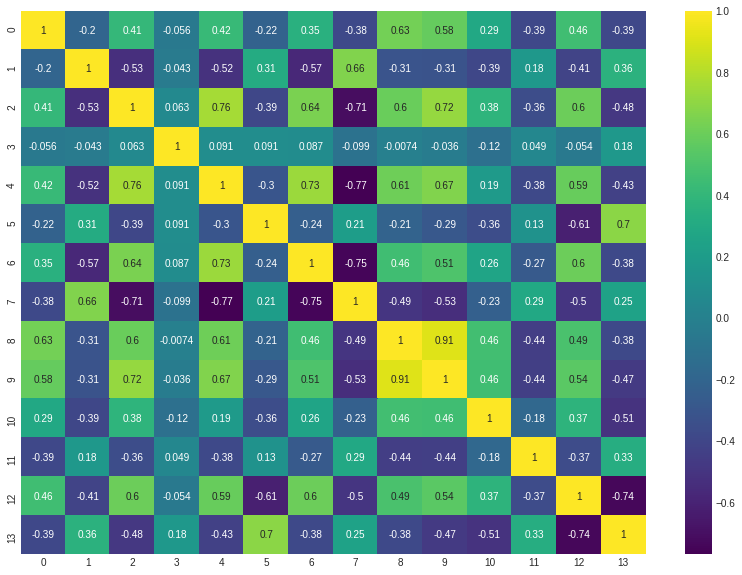

In [5]:
# plot correlation heatmap of data columns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="viridis", ax=ax)
plt.show()

## Declare features and targets

In [6]:
# create feature (X) and target (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)

## Build LASSO Model (given regularization parameter)

Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. The default value is 1.0 or a full penalty.

In [7]:
# define model
model = Lasso(alpha=1.0)

In [8]:
# define model evaluation method (cross-validation)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [9]:
# evaluate model
scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=1)

In [10]:
# force scores to be positive
scores = np.abs(scores)
print("Average MAE: {:.3f} with stdev: {:.3f}".format(scores.mean(), scores.std()))

Average MAE: 3.711 with stdev: 0.549


Running the example evaluates the Lasso Regression algorithm on the housing dataset and reports the average MAE across the three repeats of 10-fold cross-validation.

We may decide to use the Lasso Regression as our final model and make predictions on new data. This can be achieved by fitting the model on all available data and calling the predict() function, passing in a new row of data.

In [11]:
# fit model
model.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
# make predictions for new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 30.998


## Build LASSO Model (with grid-search hyperparameter tuning)

How do we know that the default hyperparameters of alpha=1.0 is appropriate for our dataset? We don’t. Instead, it is good practice to test a suite of different configurations and discover what works best for our dataset. One approach would be to grid search alpha values from perhaps 1e-5 to 100 on a log scale and discover what works best for a dataset. Another approach would be to test values between 0.0 and 1.0 with a grid separation of 0.01. We will try the latter in this case. The example below demonstrates this using the GridSearchCV class with a grid of values we have defined.

In [13]:
# define model
model = Lasso()

In [14]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [15]:
# define grid
grid = dict()
grid["alpha"] = np.arange(0, 1, 0.01)

In [16]:
# define search
search = GridSearchCV(model, grid, scoring="neg_mean_absolute_error", cv=cv, n_jobs=1)

In [ ]:
# perform the search
results = search.fit(X,y)

You might see some warnings that can be safely ignored.

In [18]:
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.01}


Running the example will evaluate each combination of configurations using repeated cross-validation.

## Build Lasso Model (with automated hyperparameter tuning)

The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the LassoCV class. To use the class, the model is fit on the training dataset as per normal and the hyperparameters are tuned automatically during the training process. The fit model can then be used to make a prediction. By default, the model will test 100 alpha values. We can change this to a grid of values between 0 and 1 with a separation of 0.01 as we did on the previous example by setting the “alphas” argument


In [19]:
# first define model evaluation method before defining model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [20]:
# define model afterwards
model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=1)

In [ ]:
# fit model
model.fit(X,y)

You might see some warnings that can be safely ignored.

In [22]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


Running the example fits the model and discovers the hyperparameters that give the best results using cross-validation. In this case, we can see that the model chose the hyperparameter of alpha=0.0. This is different from what we found via our manual grid search, perhaps due to the systematic way in which configurations were searched or selected.